<a href="https://colab.research.google.com/github/haroldpc258/Blood-Bacteria-Detection-and-Segmentation-using-Python-and-OpenCV/blob/master/ProyectoDIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DETECCIÓN DE BACTERIAS EN LA SANGRE**

Carga inicial de librerías

In [ ]:
!pip install opencv-contrib-python
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import skimage.io as io
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu

print("Librerías cargadas...")

Librerías cargadas...


Visualización

In [ ]:

INPUT = "/content/drive/MyDrive/Database";

def visualize(filename):

    """
    Help function for visualization:
    @param filename: id of image
    """
    image_path = f"{INPUT}/images/{filename}.png";
    mask_path = f"{INPUT}/masks/{filename}.png";

    # Read image
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply mask

    # 1 = blood cells
    # 2 = bacteria
    mask_applied = image.copy()
    mask_applied[mask == 1] = [255, 0, 0]
    mask_applied[mask == 2] = [255, 255, 0]

    out = image.copy()
    mask_applied = cv2.addWeighted(mask_applied, 0.5, out, 0.5, 0, out)

    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(image)
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(mask, cmap="gray")
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(mask_applied)

Extracción imagen

In [ ]:
def imagen(filename):

    """
    Help function for visualization:
    @param filename: id of image
    """
    image_path = f"{INPUT}/images/{filename}.png";
    mask_path = f"{INPUT}/masks/{filename}.png";

    # Read image
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

Imagen con la que queremos trabajar.

In [ ]:
numero_img = "025"

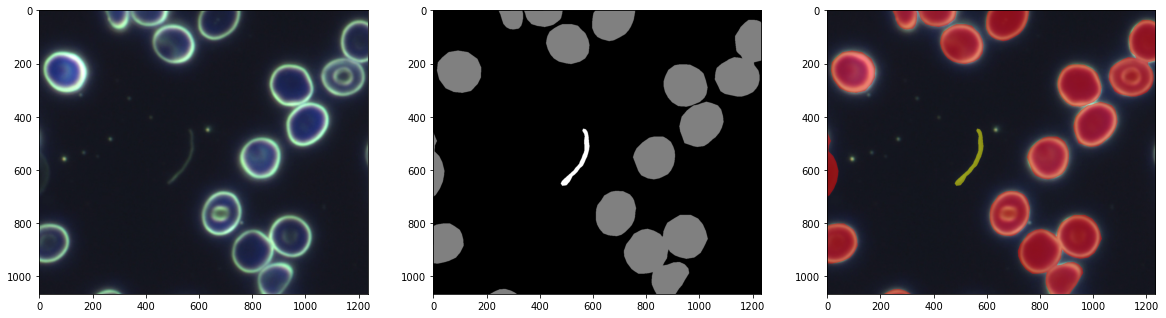

In [ ]:
visualize(numero_img)

Segmentación.

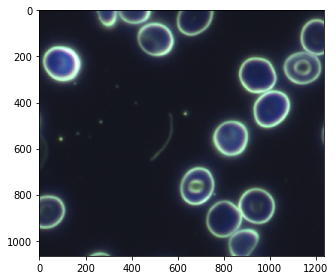

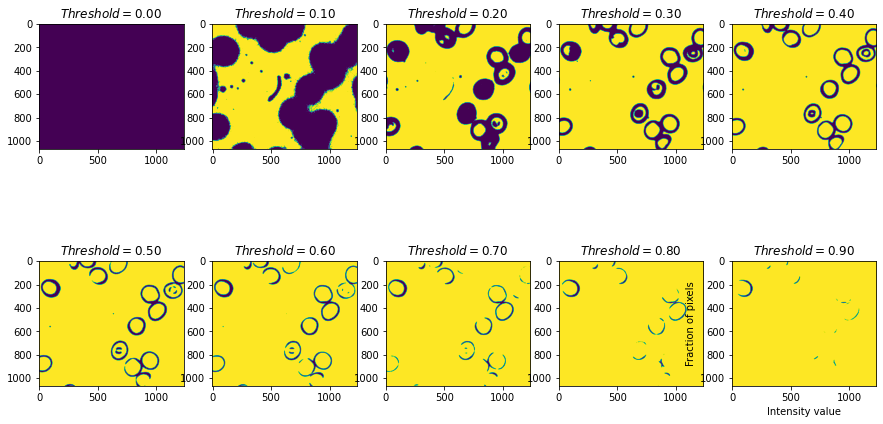

In [ ]:
img = imagen(numero_img)

show_ = io.imshow(img)
io.show()
#cv2.imwrite('Grises.png',img)
#cv2_imshow(out)

th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
img_gray = rgb2gray(img)

for th, ax in zip(th_values, axis.flatten()):
    img_binarized = img_gray < th
    ax.imshow(img_binarized)
    ax.set_title('$Threshold = %.2f$' % th)

freq, bins = histogram(img_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');


In [ ]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

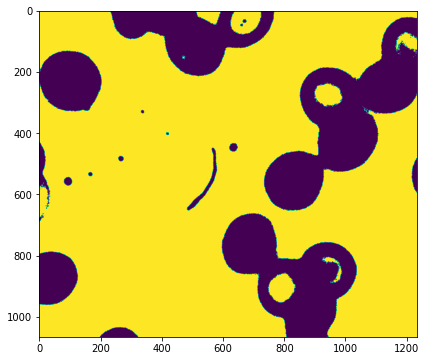

In [ ]:
imgmask2 = np.copy(img)

img_normalizada = np.copy(img_gray)
tam = np.shape(img_normalizada)
pixMin = np.min(img_normalizada)
pixMax = np.max(img_normalizada)

for normalizandoF in range(tam[0]):
 for normalizandoC in range(tam[1]):
   pixAct = img_normalizada[normalizandoF, normalizandoC]
   img_normalizada[normalizandoF, normalizandoC] = (pixAct - pixMin)/(pixMax - pixMin)


for filL1 in range(tam[0]):
 for colL1 in range(tam[1]):
   if img_normalizada[filL1, colL1] >= 0 and img_normalizada[filL1, colL1] <= 0.1: #thresh
     img_normalizada[filL1, colL1] = 1;
   else:
    img_normalizada[filL1, colL1] = 0;

filtered1 = masked_image(imgmask2, img_normalizada)
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.imshow(img_normalizada)

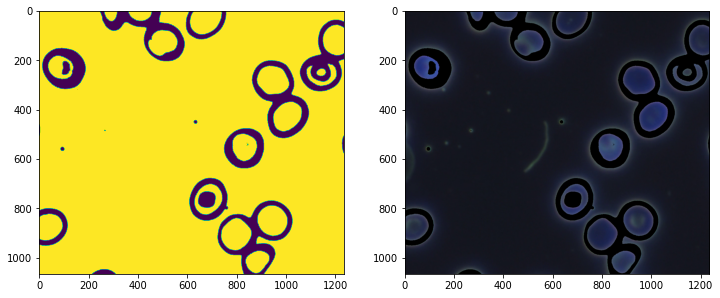

In [ ]:
imgmask1 = np.copy(img)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = threshold_otsu(img_gray)
otsu  = img_gray < thresh
ax[0].imshow(otsu)
filtered2 = masked_image(imgmask1, otsu)
ax[1].imshow(filtered2)

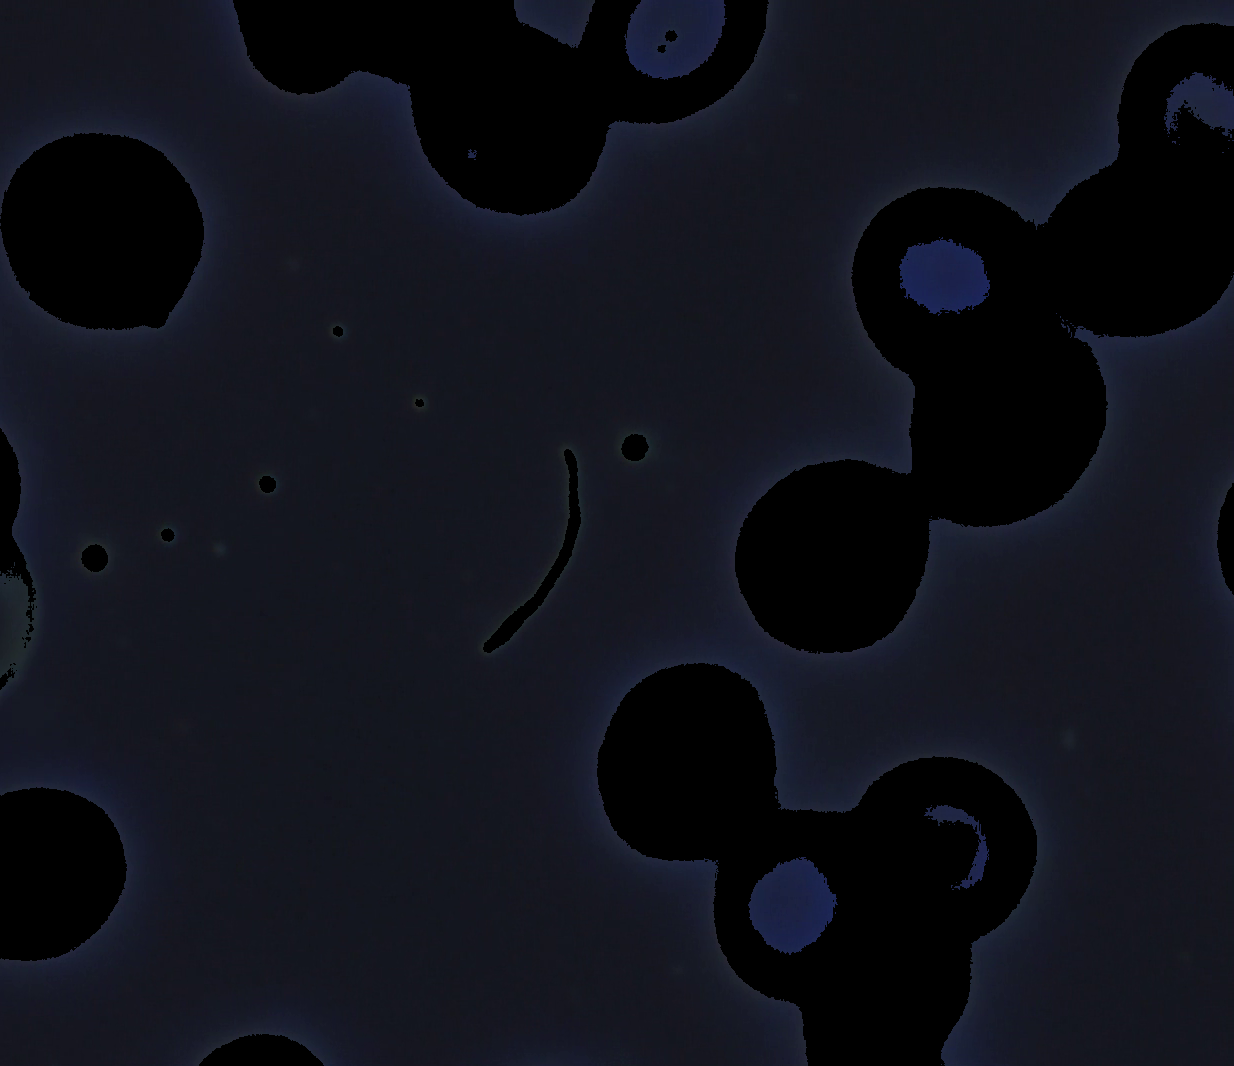

In [ ]:
f = np.copy(img)
f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)

filtered1 = masked_image(f, img_normalizada)
filtered1 = np.array(filtered1, dtype=np.uint8)
cv2_imshow(filtered1)

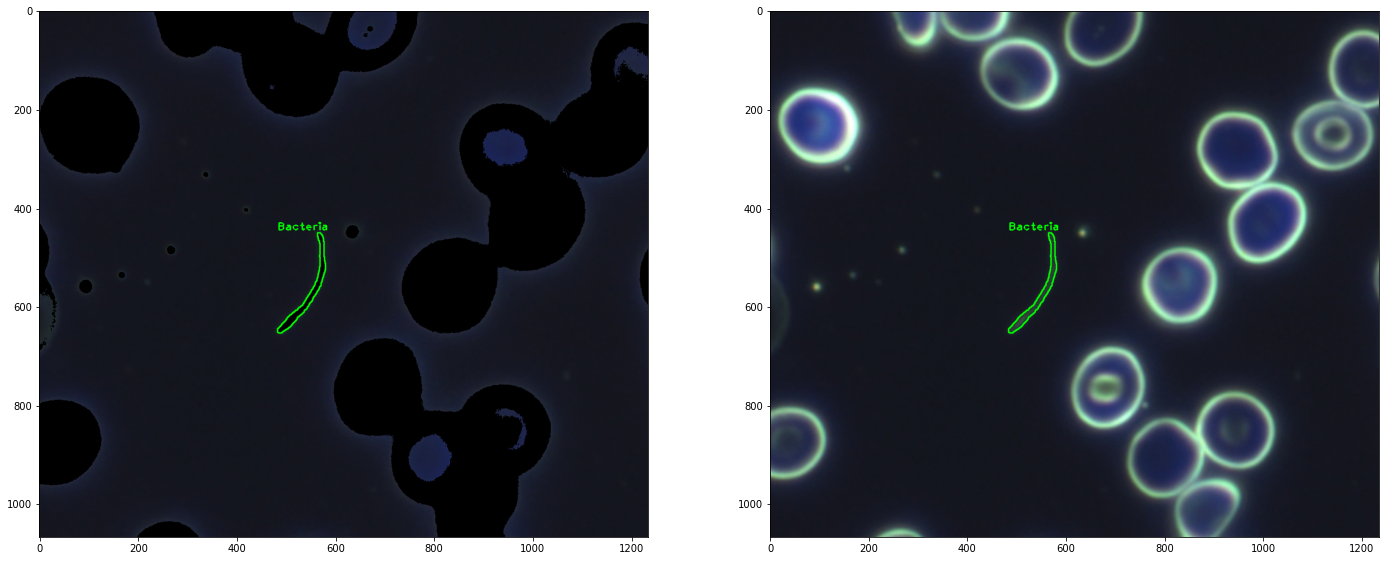

In [ ]:
image = np.copy(filtered1)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
#_, th = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4
#cv2.drawContours(image, cnts, -1, (0,255,0), 2)
for c in cnts:
  epsilon = 0.0000000000000001*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  #print(len(approx))
  x,y,w,h = cv2.boundingRect(approx)
  aspect_ratio = float(w)/h

  if aspect_ratio <= 0.5 and aspect_ratio >= 0.33 and len(approx)>10:

    cv2.putText(image,"Bacteria", (x,y-5),1,1.5,(0,255,0),2)
    cv2.drawContours(image, [approx], 0, (0,255,0),2)
    cv2.putText(f,"Bacteria", (x,y-5),1,1.5,(0,255,0),2)
    cv2.drawContours(f, [approx], 0, (0,255,0),2)


fig, ax = plt.subplots(1, 2, figsize=(24,12))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()